In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import sklearn
#import json
import warnings
warnings.filterwarnings('ignore')

## 1. Lets load the data that we preprocessed
* Step 2.  train_split_test data
* Step 3.  Feature Scaling using Standard Scale
* Step 4.  Apply PCA function

In [3]:
df= pd.read_csv("../Accident_Stats/Processed_USAccidents.csv")
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.head()   #see data and start looking to filter out data

In [13]:
df.shape

(2845342, 21)

In [ ]:
df.isna().sum() # View any null data stats... confirm no further processing is needed 

In [ ]:
df.columns   #print columns and verify preprocessed data is what we want to use to train models

# Severity will be our expected "result"
## All other columns will be used to train, test the data


In [4]:
y = df['Severity']
X = df.drop(['Severity'], axis = 1)

In [5]:
# 2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 3
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# 4  PCA 
from sklearn.decomposition import PCA
# Make an instance of the Model, apply pc on training and test of X component 
#pca = PCA(n_components = 2) #PCA of 2 might be alittle extreme... adjusting to 8
pca = PCA(n_components = 8)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

# We have values... time to set models and test which model will be appropiate for this dataset


In [6]:
# 5
#Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression 
 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [7]:
#6 Predicting the test set result 
y_pred = classifier.predict(X_test)

In [8]:
# 7
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[     0,   5192,      0,      0],
       [     5, 506662,     89,      1],
       [     2,  30858,     24,      0],
       [     0,  26228,      8,      0]])

In [10]:
from sklearn import metrics 
print("LR Accuracy:",metrics.accuracy_score(y_test, y_pred))  #Accuracy is 0.8914108783591436

LR Accuracy: 0.8903770895972193


# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import classification_report

In [24]:
from sklearn.tree import DecisionTreeClassifier
gini_tree = DecisionTreeClassifier(criterion = "gini", random_state=128).fit(X=X_train, y=y_train)

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
predicted_y = gini_tree.predict(X_test)

In [26]:
print(classification_report(predicted_y,y_test))

              precision    recall  f1-score   support

           1       0.40      0.34      0.37      6103
           2       0.92      0.93      0.93    505290
           3       0.28      0.28      0.28     31030
           4       0.33      0.32      0.32     26646

    accuracy                           0.86    569069
   macro avg       0.48      0.47      0.48    569069
weighted avg       0.86      0.86      0.86    569069



In [27]:
entropy_tree = DecisionTreeClassifier(criterion = "entropy", max_depth=4).fit(X=X_train, y=y_train)

In [28]:
predictedE_y = entropy_tree.predict(X_test)

In [29]:
print("DT Accuracy:",metrics.accuracy_score(predictedE_y, y_test))  #Accuracy is 0.8914108783591436

DT Accuracy: 0.8908234326593084


In [31]:
print(classification_report(y_test, predictedE_y, digits=4))

              precision    recall  f1-score   support

           1     0.5055    0.1595    0.2425      5192
           2     0.8920    0.9985    0.9422    506757
           3     0.7677    0.0039    0.0077     30884
           4     0.0000    0.0000    0.0000     26236

    accuracy                         0.8908    569069
   macro avg     0.5413    0.2905    0.2981    569069
weighted avg     0.8406    0.8908    0.8417    569069



In [34]:
from sklearn.ensemble import AdaBoostClassifier

In [36]:
# Fit the Adaboost classifier 
DS = AdaBoostClassifier()
DSFit= DS.fit(X_train, y_train)  #recycling existing data

In [37]:
# predict the labels for the test data
pred_y = DSFit.predict(X_test)

In [38]:
# print its performance
print(classification_report(pred_y, y_test))  #predictions are always against test data

              precision    recall  f1-score   support

           1       0.00      0.17      0.00        75
           2       1.00      0.89      0.94    568759
           3       0.00      0.17      0.00       235
           4       0.00      0.00      0.00         0

    accuracy                           0.89    569069
   macro avg       0.25      0.31      0.24    569069
weighted avg       1.00      0.89      0.94    569069



In [42]:
#gini_tree = DecisionTreeClassifier(criterion = "gini", random_state=128)
adadt = AdaBoostClassifier(base_estimator=gini_tree,n_estimators=20,random_state=145)
adadt.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=128),
                   n_estimators=20, random_state=145)

In [43]:
predictedadadt_y = adadt.predict(X_test)

In [44]:
print(classification_report(predictedadadt_y,y_test))

              precision    recall  f1-score   support

           1       0.37      0.62      0.46      3056
           2       0.97      0.92      0.94    532675
           3       0.23      0.40      0.29     17318
           4       0.30      0.50      0.38     16020

    accuracy                           0.89    569069
   macro avg       0.47      0.61      0.52    569069
weighted avg       0.92      0.89      0.90    569069



### Important feature determination

In [ ]:
Decision TREE Conclusion:
    # DT Accuracy with Scalar and Features Removed : 0.8903846401664474
    # DT Accuracy with Scalar only:                  0.8903846401664474

In [ ]:
%whos

In [ ]:
#entropy_tree = DecisionTreeClassifier(criterion = "entropy", max_depth=4).fit(X=X_train, y=y_train)

In [45]:
e_adt = AdaBoostClassifier(base_estimator=entropy_tree,n_estimators=20,random_state=145)
e_adt.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=4),
                   n_estimators=20, random_state=145)

In [46]:
predictedE_adt_y = e_adt.predict(X_test)

In [47]:
print(classification_report(predictedE_adt_y,y_test))

              precision    recall  f1-score   support

           1       0.14      0.58      0.22      1232
           2       1.00      0.89      0.94    565362
           3       0.02      0.30      0.03      1673
           4       0.01      0.21      0.01       802

    accuracy                           0.89    569069
   macro avg       0.29      0.50      0.30    569069
weighted avg       0.99      0.89      0.94    569069



In [10]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosted_tree = GradientBoostingClassifier(n_estimators=50, random_state=125)
g_boost = gradient_boosted_tree.fit(X_train,y_train)

[2 2 2 ... 2 2 2]


In [14]:
gb_predictions = g_boost.predict(X_test)
print(gb_predictions)

[2 2 2 ... 2 2 2]


In [16]:
from sklearn.metrics import classification_report
print(classification_report(gb_predictions,y_test))

              precision    recall  f1-score   support

           1       0.15      0.65      0.24      1169
           2       1.00      0.89      0.94    567726
           3       0.00      0.71      0.01       174
           4       0.00      0.00      0.00         0

    accuracy                           0.89    569069
   macro avg       0.29      0.56      0.30    569069
weighted avg       1.00      0.89      0.94    569069



<BarContainer object of 6 artists>

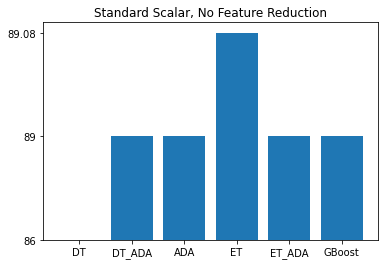

In [18]:
x_label = ['DT','DT_ADA', 'ADA', 'ET','ET_ADA', 'GBoost']
y_label = ['86','89','89','89.08','89','89']
plt.title("Standard Scalar, No Feature Reduction")
plt.bar(x_label, y_label)

<BarContainer object of 5 artists>

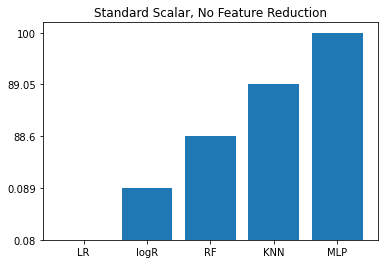

In [17]:
x2_label = ['LR','logR','RF','KNN','MLP']
y2_label = ['0.08','0.089','88.6','89.05','100']
plt.title("Standard Scalar, No Feature Reduction")
plt.bar(x2_label, y2_label)